# PROJECT ON HEART DISEASE PREDICTION USING DECISION TREE

**First step is to import all libraries**

Step 1: Import all libraries that are used in the model

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 2: Import the data that is used for the model prediction

In [12]:
df=pd.read_csv('Downloads/HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Explore the data to check the no of variables and no of records in the table**

In [13]:
df.shape

(303, 14)

In [14]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**Check the Missing Values**

In [16]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

Step 3:Consider each variable and check for the acceptance or rejection of the variable in the model

**Considering age**

In [17]:
df.age.value_counts().sum()

303

In [18]:
from scipy.stats import ttest_ind
ttest_ind(a=df['age'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=103.00041313916304, pvalue=2.4882745359625946e-238)

After performing Independent t-test,we conclude the 'Age' variable is less than the level of significance, It is a good predictor in the model

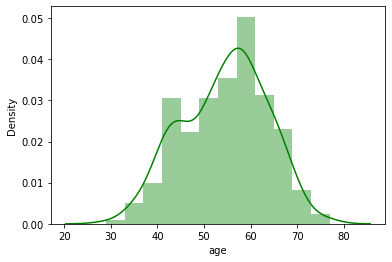

In [19]:
sns.distplot(df.age,color='green')
plt.xlabel('age')
plt.show()

**Considering Chest pain**

In [20]:
df.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

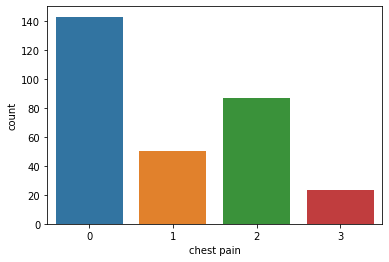

In [21]:
sns.countplot(df.chest_pain)
plt.xlabel('chest pain')
plt.show()

In [22]:
from scipy.stats import ttest_ind
ttest_ind(a=df['chest_pain'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=6.414992917860379, pvalue=3.6743127652477344e-10)

**Considering cholestrol**

In [23]:
df.cholestrol.value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: cholestrol, Length: 152, dtype: int64

In [24]:
from scipy.stats import ttest_ind
ttest_ind(a=df['target'],b=df['cholestrol'],equal_var=False)

Ttest_indResult(statistic=-82.51887021442299, pvalue=3.0221356802963283e-209)

After performing Independent t-test,we conclude the 'cholestrol' variable is less than the level of significance, It is a good predictor in the model

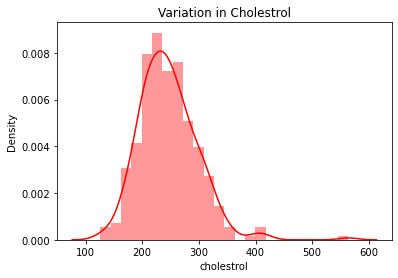

In [25]:
sns.distplot(df.cholestrol,color='red')
plt.title('Variation in Cholestrol')
plt.xlabel('cholestrol')
plt.show()

**Considering gender**

In [26]:
df.gender.value_counts()

1    207
0     96
Name: gender, dtype: int64

As the dependent variable 'gender' is categorical and response variable is also categorical, 
we need to perform Chisquare test

In [27]:
cross1=pd.crosstab(index=df['target'],columns=df['gender'])
cross1

gender,0,1
target,,
0,24,114
1,72,93


In [28]:
from scipy.stats import chi2_contingency
result=chi2_contingency(cross1)
print(result[1])


1.8767776216941532e-06


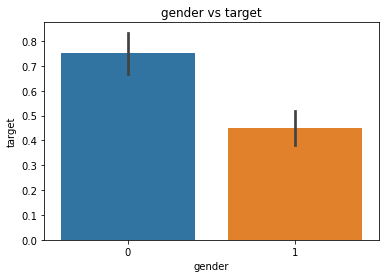

In [29]:
sns.barplot(x='gender',y='target',data=df)
plt.title('gender vs target')
plt.show()

After the test, as the 'gender' variable pvalue is more than the level of significance i.e.,(> 0.05), it is not a good predictor

**Considering rest_ecg**

In [30]:
df.rest_ecg.value_counts()

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

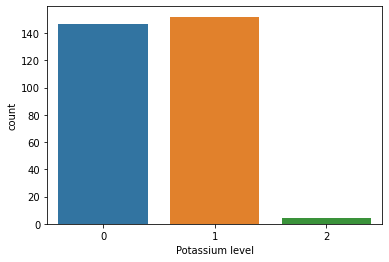

In [31]:
sns.countplot(x='rest_ecg',data=df)
plt.xlabel('Potassium level')
plt.show()

In [32]:
ttest_ind(a=df['rest_ecg'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=-0.39629477489938897, pvalue=0.6920279315601168)

After the result, the dependent variable 'rest_ecg' is more than the level of significance i.e.,(>0.05), it is not a good predictor

**Considering old_peak**

In [33]:
df.old_peak.value_counts().sum()

303

In [34]:
ttest_ind(a=df['old_peak'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=6.819096267644434, pvalue=3.295956560728633e-11)

After the result, the dependent variable 'old_peak' is less the level of significance i.e.,(<0.05), it is a good predictor

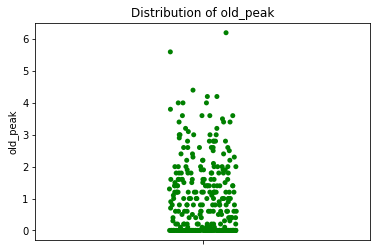

In [35]:
sns.stripplot(y=df.old_peak,color='green')
plt.title('Distribution of old_peak')
plt.show()


**Considering slope**

In [36]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [37]:
ttest_ind(a=df['slope'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=18.767280595770796, pvalue=9.740613612317738e-62)

After the result, the dependent variable 'slope' is less the level of significance i.e.,(<0.05), it is a good predictor

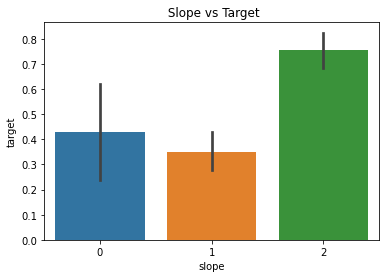

In [38]:
sns.barplot(x='slope',y='target',data=df)
plt.title(' Slope vs Target')
plt.show()

**Considering exer_angina**

In [39]:
df.exer_angina.value_counts()

0    204
1     99
Name: exer_angina, dtype: int64

In [40]:
cross2=pd.crosstab(index=df['target'],columns=df['exer_angina'])
cross2

exer_angina,0,1
target,,
0,62,76
1,142,23


In [41]:
result1=chi2_contingency(cross2)
print(result1[1])

7.454409331235655e-14


In [42]:
new_df=df[['age','gender','chest_pain','cholestrol','exer_angina','old_peak','slope','target']]
new_df

,age,gender,chest_pain,cholestrol,exer_angina,old_peak,slope,target
0,63,1,3,233,0,2.3,0,1
1,37,1,2,250,0,3.5,0,1
2,41,0,1,204,0,1.4,2,1
3,56,1,1,236,0,0.8,2,1
4,57,0,0,354,1,0.6,2,1
...,...,...,...,...,...,...,...,...
298,57,0,0,241,1,0.2,1,0
299,45,1,3,264,0,1.2,1,0
300,68,1,0,193,0,3.4,1,0
301,57,1,0,131,1,1.2,1,0


In [43]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
mylogit = smf.glm(formula='target~age+gender+chest_pain+cholestrol+exer_angina+old_peak+slope', data=new_df, family=sm.families.Binomial())
res = mylogit.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      295
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.91
Date:                Sun, 08 Aug 2021   Deviance:                       251.82
Time:                        11:52:13   Pearson chi2:                     278.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7848      1.474      3.245      

In [44]:
X=new_df.drop(['target'],axis=1)
X

,age,gender,chest_pain,cholestrol,exer_angina,old_peak,slope
0,63,1,3,233,0,2.3,0
1,37,1,2,250,0,3.5,0
2,41,0,1,204,0,1.4,2
3,56,1,1,236,0,0.8,2
4,57,0,0,354,1,0.6,2
...,...,...,...,...,...,...,...
298,57,0,0,241,1,0.2,1
299,45,1,3,264,0,1.2,1
300,68,1,0,193,0,3.4,1
301,57,1,0,131,1,1.2,1


In [45]:
Y=new_df['target']


**Train and Test Data**

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

**Train set**

In [47]:
trn=y_train.value_counts()
trn

1    98
0    83
Name: target, dtype: int64

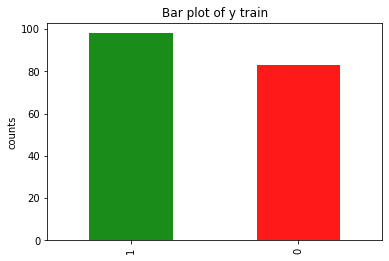

In [48]:
trn.plot.bar(color=('g','r'),alpha=0.9)
plt.title('Bar plot of y train')
plt.ylabel('counts')
plt.show()

**Test set**

In [49]:
tst=y_test.value_counts()
tst

1    67
0    55
Name: target, dtype: int64

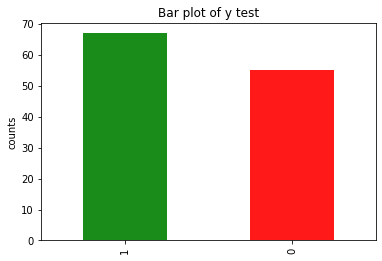

In [50]:
tst.plot.bar(color=('g','r'),alpha=0.9)
plt.title('Bar plot of y test')
plt.ylabel('counts')
plt.show()

**MODEL BUILDING**

In [51]:
from sklearn import tree


In [52]:
clf=tree.DecisionTreeClassifier()
clfFit=clf.fit(x_train,y_train)
print(clfFit)

DecisionTreeClassifier()


**Plot Tree**

[Text(182.51250000000002, 209.07692307692307, 'X[2] <= 0.5\ngini = 0.497\nsamples = 181\nvalue = [83, 98]'),
 Text(109.275, 192.35076923076923, 'X[5] <= 0.7\ngini = 0.41\nsamples = 87\nvalue = [62, 25]'),
 Text(69.75, 175.62461538461537, 'X[4] <= 0.5\ngini = 0.486\nsamples = 36\nvalue = [15, 21]'),
 Text(37.2, 158.89846153846153, 'X[0] <= 41.5\ngini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(27.900000000000002, 142.1723076923077, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(46.5, 142.1723076923077, 'X[3] <= 316.5\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(37.2, 125.44615384615385, 'X[3] <= 200.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(18.6, 108.72, 'X[0] <= 50.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(9.3, 91.99384615384615, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(27.900000000000002, 91.99384615384615, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(55.800000000000004, 108.72, 'X[0] <= 66.5\ngini = 0.111\nsamples = 17\nvalue = [1

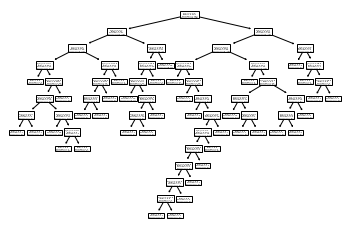

In [53]:
tree.plot_tree(clfFit)

In [58]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda

  added / updated specs:
    - graphviz


The following packages will be downloaded:
Note: you may need to restart the kernel to use updated packages.


    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38h9f7ea03_0         2.9 MB
    graphviz-2.38              |       hfa6e2cd_3        29.1 MB
    ------------------------------------------------------------
                                           Total:        32.0 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-32::graphviz-2.38-hfa6e2cd_3

The following packages will be UPDATED:

  conda                               4.10.1-py38h9f7ea03_1 --> 4.10.3-py38h9f7ea03_0




conda-4.10.3         | 2.9 MB    |            |   0% 
conda-4.10.3         | 2.9 MB    |            |   1% 
conda-4.10.3         | 2.9 MB    | 1 

In [59]:
import graphviz


graphviz-2.38        | 29.1 MB   | 3          |   3% 
graphviz-2.38        | 29.1 MB   | 3          |   3% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 3          |   4% 
graphviz-2.38        | 29.1 MB   | 4          |   4% 
graphviz-2.38        | 29.1 MB   | 4          |   4% 
graphviz-2.38        | 29.1 MB   | 4          |   4% 
graphviz-2.38        | 29.1 MB   | 4          |   4% 
graphviz-2.38        | 29.1 MB   | 4          |   4% 
graphviz-2.38        | 29.1 MB   | 4          |   4% 
graphviz-2.38        | 29.1 MB   | 4          |   4% 
graphviz-2.38        | 29.1

graphviz-2.38        | 29.1 MB   | ###1       |  31% 
graphviz-2.38        | 29.1 MB   | ###1       |  31% 
graphviz-2.38        | 29.1 MB   | ###1       |  31% 
graphviz-2.38        | 29.1 MB   | ###1       |  32% 
graphviz-2.38        | 29.1 MB   | ###1       |  32% 
graphviz-2.38        | 29.1 MB   | ###1       |  32% 
graphviz-2.38        | 29.1 MB   | ###1       |  32% 
graphviz-2.38        | 29.1 MB   | ###1       |  32% 
graphviz-2.38        | 29.1 MB   | ###2       |  32% 
graphviz-2.38        | 29.1 MB   | ###2       |  32% 
graphviz-2.38        | 29.1 MB   | ###2       |  32% 
graphviz-2.38        | 29.1 MB   | ###2       |  32% 
graphviz-2.38        | 29.1 MB   | ###2       |  32% 
graphviz-2.38        | 29.1 MB   | ###2       |  33% 
graphviz-2.38        | 29.1 MB   | ###2       |  33% 
graphviz-2.38        | 29.1 MB   | ###2       |  33% 
graphviz-2.38        | 29.1 MB   | ###2       |  33% 
graphviz-2.38        | 29.1 MB   | ###3       |  33% 
graphviz-2.38        | 29.1 

In [73]:
dot_data=tree.export_graphviz(clf,out_file=None,filled=True, rounded=True)
graph=graphviz.Source(dot_data)
graph.render('b1')

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

**PREDICTION**

In [62]:
y_predict=clfFit.predict(x_test)
y_predict

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [63]:
cm_tree=pd.crosstab(y_test,y_predict,rownames=["Actual"],colnames=["Predicted"],margins=True)
cm_tree

Predicted,0,1,All
Actual,,,
0,37,18,55
1,18,49,67
All,55,67,122


**RESULT**

In [64]:
confusion_matrix(y_test,y_predict)

array([[37, 18],
       [18, 49]], dtype=int64)

In [65]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        55
           1       0.73      0.73      0.73        67

    accuracy                           0.70       122
   macro avg       0.70      0.70      0.70       122
weighted avg       0.70      0.70      0.70       122



In [66]:
accuracy_score(y_test,y_predict)

0.7049180327868853

**ROC CURVE**

In [67]:
fpr, tpr, thresholds =roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr) 
print(roc_auc)

0.7020352781546813


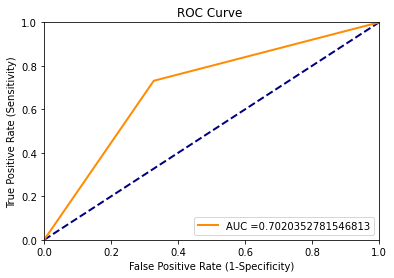

In [71]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--',color='navy',lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=2,color='darkorange')
plt.legend(loc=4) #Location of label
plt.show()